___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png" width="350px" height="480px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- 
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png</p>

### <font color= #2E9AFE> Tema: Regresión Lineal</font>

La regresión lineal es un método matemático simple que se utiliza para comprender la relación lineal entre una variable dependiente (lo que desea predecir) y una variable individual o un grupo de variables independientes (los factores que cree que afectan el valor de la variable dependiente).



**¿Qué es la regresión?**

La regresión muestra una línea o curva que pasa por todos los puntos de datos en un gráfico de tal manera que la distancia vertical entre los puntos de datos y la línea de regresión es la mínima. 

Se usa principalmente para predicción pero también es muy usada para determinar la relación causa-efecto de las variables. 

Si hay una sola variable de entrada (x), dicha regresión lineal se denomina *regresión lineal simple*. Y si hay más de una variable de entrada, dicha regresión lineal se denomina *regresión lineal múltiple*.

## Cuándo se recomienda usar la regresión lineal?

1. Cuando la relación entre las variables independientes  y la variable dependiente es aproximadamente lineal
2. Cuando la distribución de las variables de entrada siguen una distribución normal
3. Cuando los datos cumplen algunos supuestos
    - Linealidad
    - No Multicolinealidad
    - Homoscedasticidad
    - Normalidad en los residuales
4. Incluso si los modelos más complejos pudieran ajustarse un poco mejor, la regresión lineal es ideal cuando el conjunto de datos es “explicable” y las partes interesadas necesitan coeficientes para comprender la influencia de cada variable.
5. Cuando no tienes muchos outliers

# Regresión Lineal Múltiple

In [ ]:
# pip install pandas seaborn matplotlib scikit-learn statsmodels

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

Este dataset contiene información sobre el número de anuncios que se hizo por diferentes medios (TV, Radio, Newspaper, Sales) y el total de ventas que hubo. 

In [ ]:
#Vistazo a los datos
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


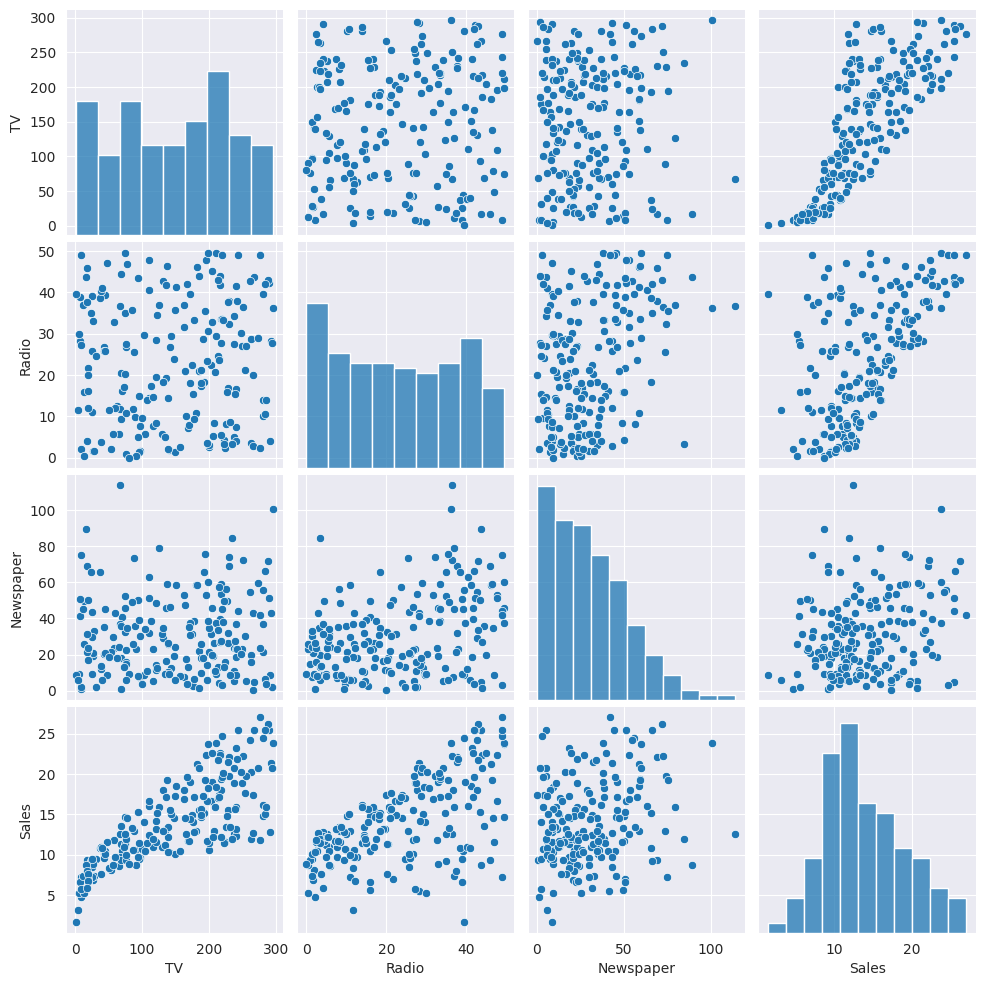

In [ ]:
sns.pairplot(data)

## Supuestos de la regresión lineal

Cuando se cumplen las siguientes suposiciones, nos podemos asegurar que los resultados son confiables

1. Linealidad
2. No Multicolinealidad
3. Homoscedasticidad
4. Normalidad en los residuales

### Linealidad

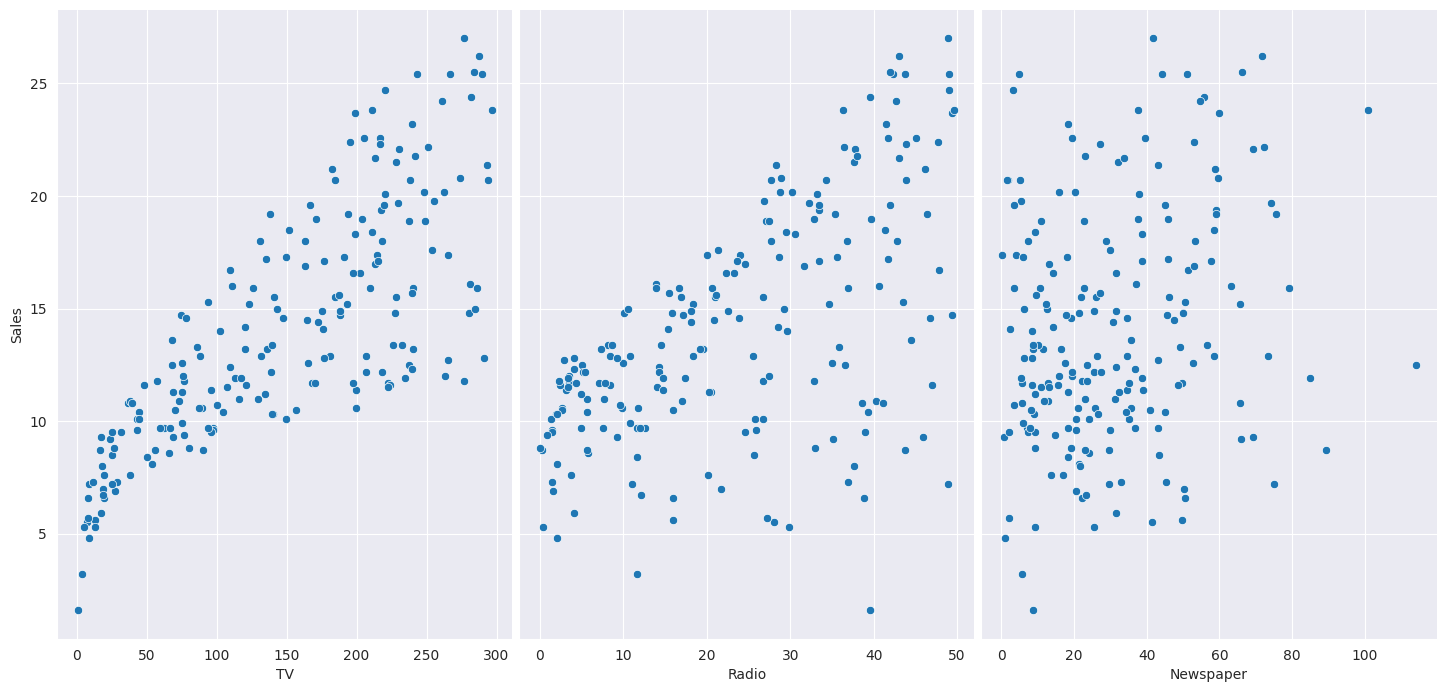

In [ ]:
# Observar la relacion entre las variables independientes y la dependiente
p = sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

**Conclusion:**

Ahora el resto de los supuestos requieren que realicemos la regresión antes de que podamos verificarlos. Así que realicemos una regresión....

In [ ]:
#Ajustamos un modelo lineal
x = data.drop(["Sales"],axis=1)
y = data.Sales

In [ ]:
#Dividimos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.25)

In [ ]:
#Escalamos los datos los datos
#Qué hacemos? normalizamos o estandarizamos?
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Entrenamos el modelo

#Inicializamos el modelo
reg = LinearRegression()

#Entrenamos el modelo con los datos de entrenamiento
reg.fit(X_train_scaled,y_train)

#Predecimos con el modelo entrenado en el test
y_pred = reg.predict(X_test_scaled)

#Predecimos con el modelo entrenado en el train
y_pred_train = reg.predict(X_train_scaled)

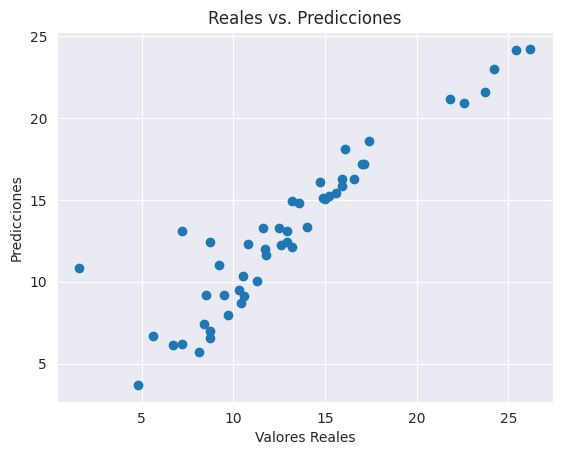

In [ ]:
#graficamos las prediccions vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Reales vs. Predicciones")
plt.show()

### Homoscedasticidad

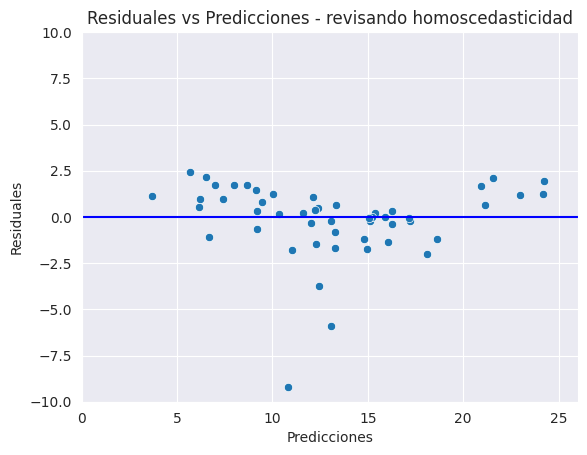

In [ ]:
#buscamos patrones en los residuales. Si no hay patrones y están de forma aleatoria graficados entonces es bueno
residuales = y_test - y_pred
p = sns.scatterplot(x=y_pred, y=residuales)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuales vs Predicciones - revisando homoscedasticidad')


### Normalidad de los residuales


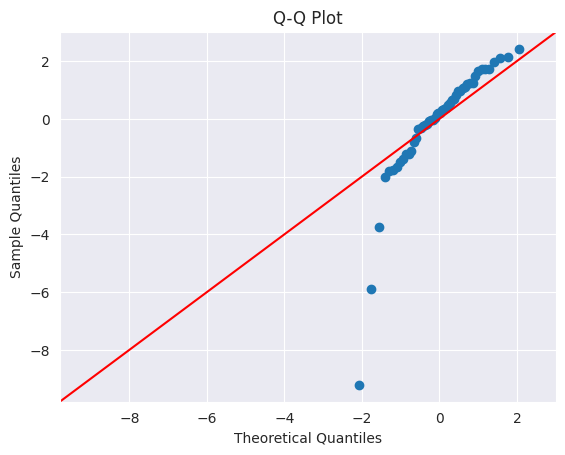

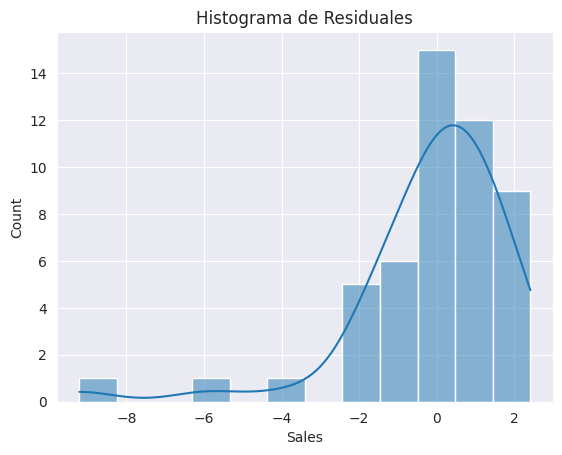

Shapiro-Wilk Test p-value: 7.172150700356459e-07


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(residuales, line='45')
plt.title("Q-Q Plot")
plt.show()

# Alternativamente, usamos un histograma
sns.histplot(residuales, kde=True)
plt.title("Histograma de Residuales")
plt.show()

# Shapiro-Wilk test para la normalidad
shapiro_test = stats.shapiro(residuales)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')


Se utiliza una prueba de Shapiro-Wilk para evaluar la normalidad de un conjunto de datos. La hipótesis nula (𝐻0) para la prueba de Shapiro-Wilk es que los datos se distribuyen normalmente.

La hipótesis alternativa (𝐻1) es que los datos no se distribuyen normalmente.

Este valor tan pequeño obtenido nos dice que se rechaza la hipótesis nula, por lo tanto los residuales no están distribuidos normalmente. 

### No multicolinealidad

En regresión, la multicolinealidad se refiere al grado en que las variables independientes están correlacionadas. 

La multicolinealidad afecta los coeficientes y los p-values, pero no influye en las predicciones, la precisión de las predicciones. 

**NOTA**: Si tu objetivo principal es hacer predicciones y no necesitas interpretar o entender el papel de cada variable independiente, no necesitas reducir la multicolinealidad severa.

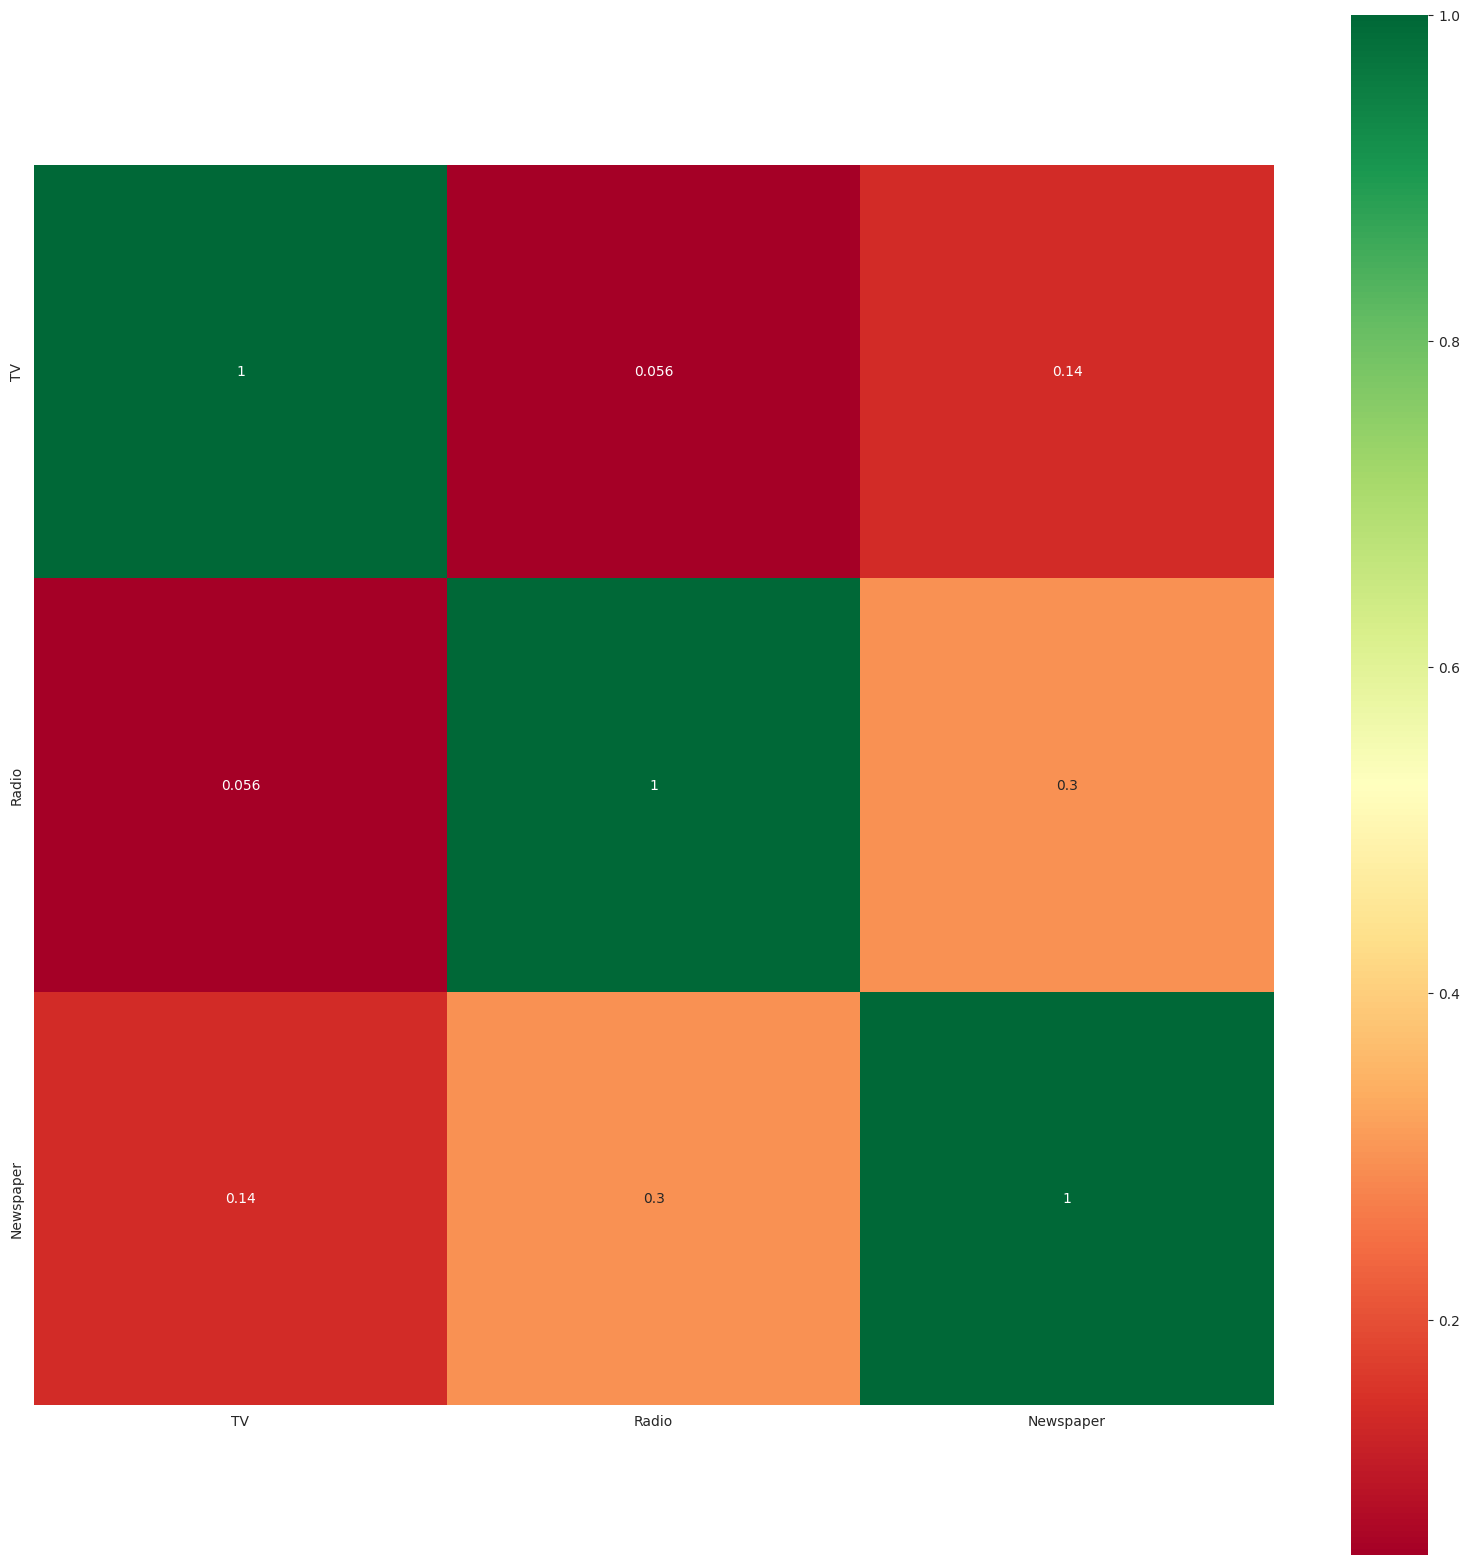

In [ ]:
plt.figure(figsize=(20,20))
p=sns.heatmap(X_train.corr(), annot=True,cmap='RdYlGn',square=True)

La correlación dentro de las variables dependientes es lo que debemos buscar y evitar. 

Conclusion:


En caso de que hubiera alguna, intentaríamos eliminar una de las variables correlacionadas dependiendo de cuál fuera más importante para nuestro modelo de regresión.

### Qué tan preocupado debería estar si mi modelo no es perfecto, si mis residuales se ven un poquito mal?

La respuesta es... Tu decides.

Si estás publicando tu tesis en física de partículas, probablemente quieres asegurarse de que tu modelo sea lo más preciso posible. Si estás tratando de realizar un análisis rápido y sucio de las ventas del puesto de limonada de tu sobrino, un modelo no perfecto podría ser lo suficientemente bueno para responder cualquier pregunta que tengas (por ejemplo, si la "temperatura" parece afectar los "ingresos").

La mayoría de las veces, un modelo decente es mejor que ninguno. Así que toma el modelo, intenta mejorarlo y luego decide si la precisión es lo suficientemente buena como para ser útil para tus propósitos.


Aquí te dejo un poco de documentación si quieres indagar en formas de cómo mejorar los resultados de una regresión lineal:
https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

### Evaluando el modelo


In [ ]:
print(f"R^2 test: {r2_score(y_test, y_pred)}")
print(f"R^2 train: {r2_score(y_train, y_pred_train)}")

print(f"RMSE test: {root_mean_squared_error(y_test, y_pred)}")
print(f"RMSE train: {root_mean_squared_error(y_train, y_pred_train)}")

print(f"MAE test: {mean_absolute_error(y_test, y_pred)}")
print(f"MAE train: {mean_absolute_error(y_train, y_pred_train)}")

R^2 test: 0.8576396745320891
R^2 train: 0.9072183330817297
RMSE test: 2.003121944095542
RMSE train: 1.561703394819531
MAE test: 1.3000320919235457
MAE train: 1.2248611099616429


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# KFold para regresion
kf = KFold(n_splits=10, shuffle=True, random_state=42)


#creamos un pipeline donde estandarizamos los datos de entrenamiento y luego aplicamos el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
scores = cross_val_score(pipeline, x, y, cv=kf, scoring='neg_root_mean_squared_error')
print(f"  MSE scores: {scores*-1}")
print(f"  Mean MSE: {(scores).mean()*-1:.4f}\n")

  MSE scores: [1.76940727 1.78494627 2.04823126 1.60041145 1.25125831 1.26813521
 1.53201384 1.73001542 1.41590033 2.44122479]
  Mean MSE: 1.6842



### Curva de aprendizaje

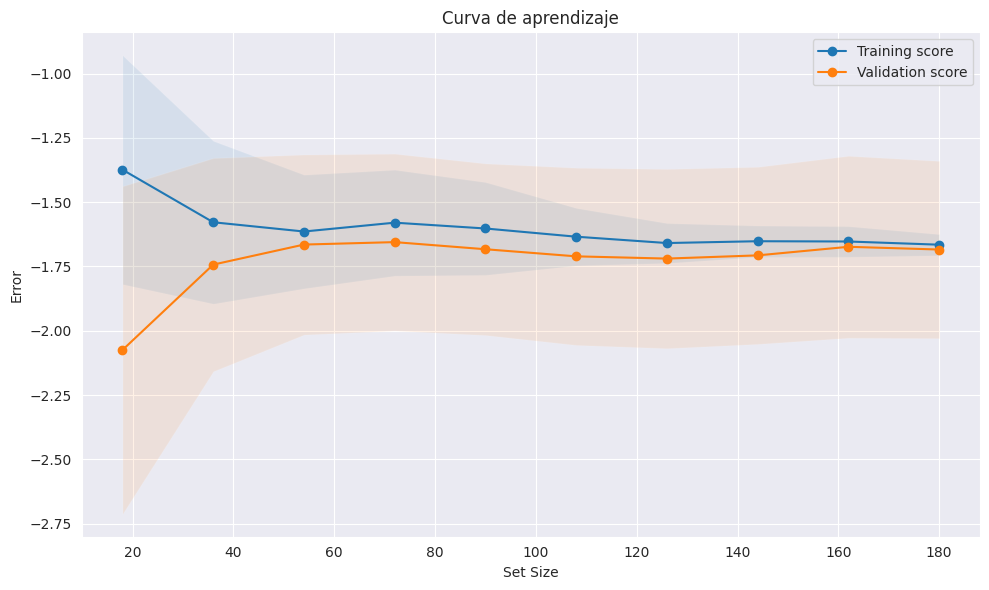

In [ ]:
from sklearn.model_selection import learning_curve

# curva de aprendizaje
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline,
    X=x,
    y=y,
    cv=kf,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('Curva de aprendizaje')
plt.xlabel('Set Size')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()